# Reading from and Writing to Files using Python

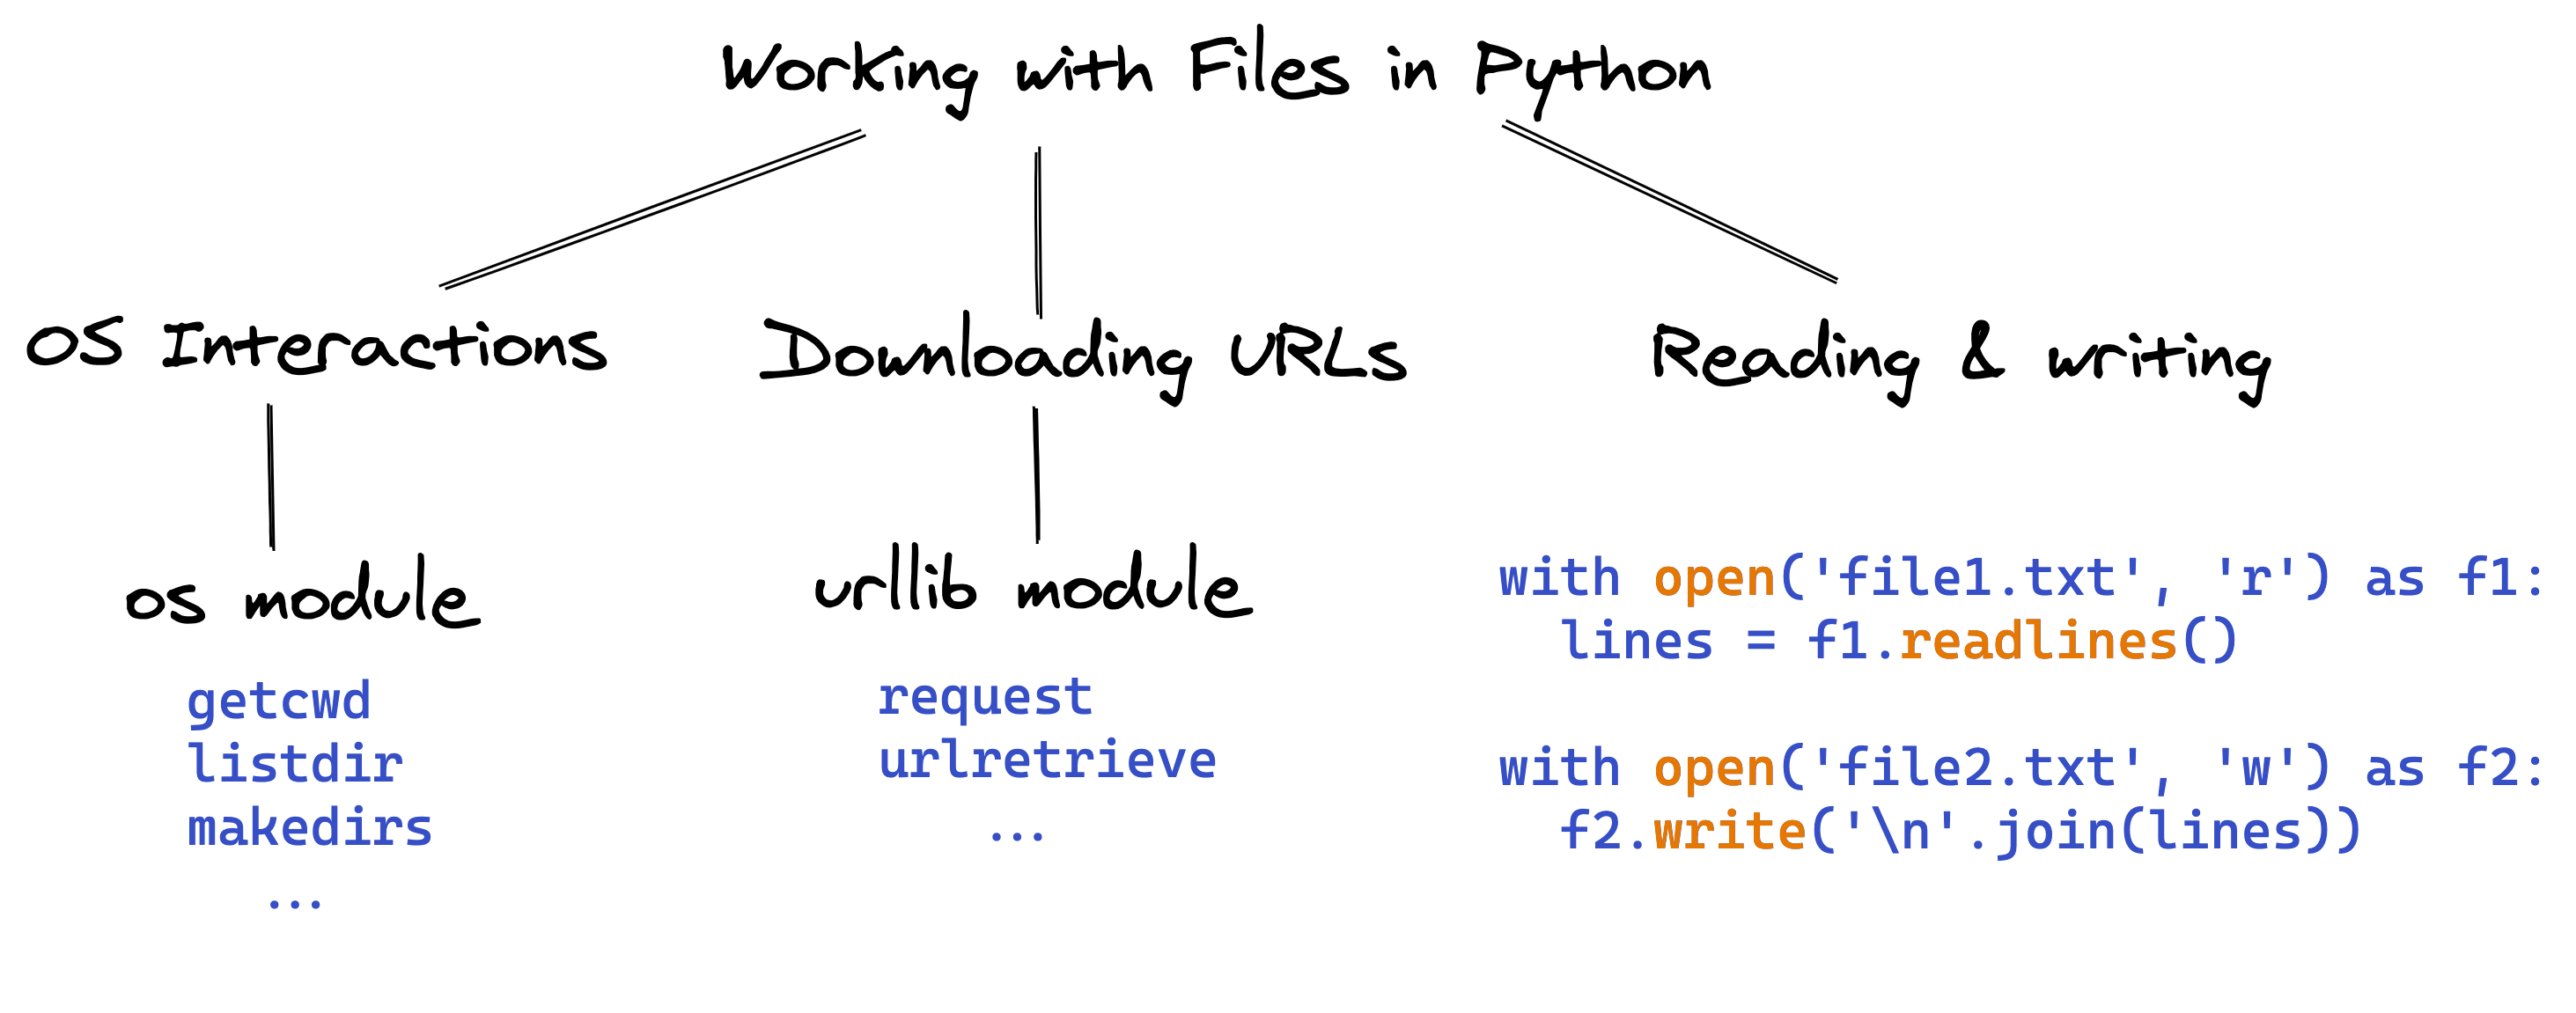

This tutorial covers the following topics:

*Interacting with the filesystem using the os module

*Downloading files from the internet using the urllib module

*Reading and processing data from text files

*Parsing data from CSV files into dictionaries & lists

*Writing formatted data back to text files

### Interacting with the OS and filesystem¶
The os module in Python provides many functions for interacting with the OS and the filesystem. Let's import it and try out some examples.

In [137]:
import  os

In [138]:
os.getcwd()

'/home/lflorenzan/pyntbook/fuctions/__pycache__'

To get the list of files in a directory, use os.listdir. You pass an absolute or relative path of a directory as the argument to the function.

In [139]:
help(os.listdir)

Help on built-in function listdir in module posix:

listdir(path=None)
    Return a list containing the names of the files in the directory.
    
    path can be specified as either str, bytes, or a path-like object.  If path is bytes,
      the filenames returned will also be bytes; in all other circumstances
      the filenames returned will be str.
    If path is None, uses the path='.'.
    On some platforms, path may also be specified as an open file descriptor;\
      the file descriptor must refer to a directory.
      If this functionality is unavailable, using it raises NotImplementedError.
    
    The list is in arbitrary order.  It does not include the special
    entries '.' and '..' even if they are present in the directory.



In [140]:
os.listdir('.') # relative path

['code.cpython-39.pyc', 'osdata.ipynb', 'data', 'data2']

In [141]:
os.listdir('/usr') # absolute path

['bin',
 'games',
 'include',
 'lib',
 'lib32',
 'lib64',
 'libexec',
 'libx32',
 'local',
 'sbin',
 'share',
 'src']

In [142]:
os.listdir('/usr/lib')

['X11',
 'apt',
 'binfmt.d',
 'cpp',
 'dbus-1.0',
 'dpkg',
 'environment.d',
 'file',
 'gcc',
 'git-core',
 'gnupg',
 'gnupg2',
 'groff',
 'ifupdown',
 'init',
 'kernel',
 'locale',
 'lsb',
 'man-db',
 'mime',
 'modprobe.d',
 'modules-load.d',
 'openssh',
 'pam.d',
 'policykit-1',
 'pulse-14.2',
 'python3',
 'python3.9',
 'runit-helper',
 'sasl2',
 'ssl',
 'sudo',
 'sysctl.d',
 'systemd',
 'sysusers.d',
 'tc',
 'terminfo',
 'tmpfiles.d',
 'udev',
 'valgrind',
 'x86_64-linux-gnu',
 'tcltk',
 'blt2.5',
 'libBLT.2.5.so.8.6',
 'libBLTlite.2.5.so.8.6',
 'sftp-server',
 'compat-ld',
 'gold-ld',
 'bfd-plugins',
 'os-release',
 'galera',
 'mysql',
 'libgalera_smm.so',
 'binfmt-support',
 'libblosc.so.1.20.1',
 'libblosc.so.1',
 'llvm-9']

You can create a new directory using os.makedirs. Let's create a new directory called data, where we'll later download some files.

In [143]:
os.makedirs('./data', exist_ok=True)

Can you figure out what the argument exist_ok does? Try using the help function or read the documentation.

Let's verify that the directory was created and is currently empty.

In [144]:
'data' in os.listdir('.')

True

In [145]:
os.listdir('./data')

['loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'emis2.txt',
 'emis3.txt',
 'emis1.txt']

Let us download some files into the data directory using the urllib module.

In [146]:
url1 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans1.txt'
url2 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans2.txt'
url3 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans3.txt'

In [147]:
from urllib.request import urlretrieve

In [148]:
urlretrieve(url1, './data/loans1.txt')

('./data/loans1.txt', <http.client.HTTPMessage at 0x792e5044fd30>)

In [149]:
urlretrieve(url2, './data/loans2.txt')

('./data/loans2.txt', <http.client.HTTPMessage at 0x792e5044fbb0>)

In [150]:
urlretrieve(url3, './data/loans3.txt')

('./data/loans3.txt', <http.client.HTTPMessage at 0x792e503acbb0>)

Let's verify that the files were downloaded.

In [151]:
os.listdir('./data')

['loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'emis2.txt',
 'emis3.txt',
 'emis1.txt']

### Reading from a file
To read the contents of a file, we first need to open the file using the built-in open function. The open function returns a file object and provides several methods for interacting with the file's contents.

In [152]:
file1 = open('./data/loans1.txt', mode='r')

The open function also accepts a mode argument to specifies how we can interact with the file. The following options are supported:

    ========= ===============================================================
    Character Meaning
    --------- ---------------------------------------------------------------
    'r'       open for reading (default)
    'w'       open for writing, truncating the file first
    'x'       create a new file and open it for writing
    'a'       open for writing, appending to the end of the file if it exists
    'b'       binary mode
    't'       text mode (default)
    '+'       open a disk file for updating (reading and writing)
    'U'       universal newline mode (deprecated)
    ========= ===============================================================
To view the contents of the file, we can use the read method of the file object.

In [153]:
file1_contents = file1.read()

In [154]:
file1_contents

'amount,duration,rate,down_payment\n100000,36,0.08,20000\n200000,12,0.1,\n628400,120,0.12,100000\n4637400,240,0.06,\n42900,90,0.07,8900\n916000,16,0.13,\n45230,48,0.08,4300\n991360,99,0.08,\n423000,27,0.09,47200'

In [155]:
print(file1_contents)

amount,duration,rate,down_payment
100000,36,0.08,20000
200000,12,0.1,
628400,120,0.12,100000
4637400,240,0.06,
42900,90,0.07,8900
916000,16,0.13,
45230,48,0.08,4300
991360,99,0.08,
423000,27,0.09,47200


The file contains information about loans. It is a set of comma-separated values (CSV).

CSVs: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)

The first line of the file is the header, indicating what each of the numbers on the remaining lines represents. Each of the remaining lines provides information about a loan. Thus, the second line 100000,36,0.08,20000 represents a loan with:

an amount of $100000,
duration of 36 months,
rate of interest of 8% per annum, and
a down payment of $20000
The CSV is a standard file format used for sharing data for analysis and visualization. Over the course of this tutorial, we will read the data from these CSV files, process it, and write the results back to files. Before we continue, let's close the file using the close method (otherwise, Python will continue to hold the entire file in the RAM)

In [156]:
file1.close()

Once a file is closed, you can no longer read from it.

### Closing files automatically using with
To close a file automatically after you've processed it, you can open it using the with statement.

In [157]:
with open('./data/loans2.txt','r') as file2:
    file2_contents = file2.read()
    print(file2_contents)

amount,duration,rate,down_payment
828400,120,0.11,100000
4633400,240,0.06,
42900,90,0.08,8900
983000,16,0.14,
15230,48,0.07,4300


Once the statements within the with block are executed, the .close method on file2 is automatically invoked. Let's verify this by trying to read from the file object again.

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_32/3036511092.py in <module>
----> 1 file2.read()

ValueError: I/O operation on closed file.

### Reading a file line by line
File objects provide a readlines method to read a file line-by-line.

In [158]:
with open('./data/loans3.txt', 'r') as file3:
    for file3_read in file3:
        file3_read= file3.read()

In [159]:
file3_read

'45230,48,0.07,4300\n883000,16,0.14,\n100000,12,0.1,\n728400,120,0.12,100000\n3637400,240,0.06,\n82900,90,0.07,8900\n316000,16,0.13,\n15230,48,0.08,4300\n991360,99,0.08,\n323000,27,0.09,4720010000,36,0.08,20000\n528400,120,0.11,100000\n8633400,240,0.06,\n12900,90,0.08,8900'

In [160]:
with open('./data/loans3.txt', 'r') as file3:
    file3_lines = file3.readlines()

In [161]:
file3_lines

['amount,duration,rate,down_payment\n',
 '45230,48,0.07,4300\n',
 '883000,16,0.14,\n',
 '100000,12,0.1,\n',
 '728400,120,0.12,100000\n',
 '3637400,240,0.06,\n',
 '82900,90,0.07,8900\n',
 '316000,16,0.13,\n',
 '15230,48,0.08,4300\n',
 '991360,99,0.08,\n',
 '323000,27,0.09,4720010000,36,0.08,20000\n',
 '528400,120,0.11,100000\n',
 '8633400,240,0.06,\n',
 '12900,90,0.08,8900']

In [162]:
file3_lines[0].strip()

'amount,duration,rate,down_payment'

In [163]:
file3_lines[3].strip()

'100000,12,0.1,'

In [164]:
print(file2_contents)

amount,duration,rate,down_payment
828400,120,0.11,100000
4633400,240,0.06,
42900,90,0.08,8900
983000,16,0.14,
15230,48,0.07,4300


In [165]:
'828400,120,0.11,100000'.split(',')

['828400', '120', '0.11', '100000']

In [166]:
loan1= {
    'amount':828400,
    'duration':120,
    'rate': 0.11,
    'down_payment': 100000
}

### Processing data from files
Before performing any operations on the data stored in a file, we need to convert the file's contents from one large string into Python data types. For the file loans1.txt containing information about loans in a CSV format, we can do the following:

Read the file line by line
Parse the first line to get a list of the column names or headers
Split each remaining line and convert each value into a float
Create a dictionary for each loan using the headers as keys
Create a list of dictionaries to keep track of all the loans
Since we will perform the same operations for multiple files, it would be useful to define a function read_csv. We'll also define some helper functions to build up the functionality step by step.

Let's start by defining a function parse_header that takes a line as input and returns a list of column headers

In [167]:
def parse_headers(header_line):
    return header_line.strip().split(',')

The strip method removes any extra spaces and the newline character \n. The split method breaks a string into a list using the given separator (, in this case).

In [168]:
with open('./data/loans3.txt', 'r') as file3:
    file3_lines = file3.readlines()

In [169]:
file3_lines[0]

'amount,duration,rate,down_payment\n'

In [170]:
headers = parse_headers(file3_lines[0])


In [171]:
headers

['amount', 'duration', 'rate', 'down_payment']

Next, let's define a function parse_values that takes a line containing some data and returns a list of floating-point numbers.

In [172]:
def parse_values(data_line):
    values = []
    for item in data_line.strip().split(','):
        values.append(float(item))
    return values

In [173]:
file3_lines[1]

'45230,48,0.07,4300\n'

In [174]:
parse_values(file3_lines[1])

[45230.0, 48.0, 0.07, 4300.0]

In [175]:
file3_lines[4]

'728400,120,0.12,100000\n'

In [176]:
file3_lines[4].strip().split(',')

['728400', '120', '0.12', '100000']

In [177]:
parse_values(file3_lines[4])

[728400.0, 120.0, 0.12, 100000.0]

The values were parsed and converted to floating point numbers, as expected. Let's try it for another line from the file, which does not contain a value for the down payment.

In [178]:
file3_lines[2]

'883000,16,0.14,\n'

In [179]:
file3_lines[2].strip().split(',')

['883000', '16', '0.14', '']

parse_values(file3_lines[2])

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_32/757119364.py in <module>
----> 1 parse_values(file3_lines[2])

/tmp/ipykernel_32/1166133095.py in parse_values(data_line)
      2     values = []
      3     for item in data_line.strip().split(','):
----> 4         values.append(float(item))
      5     return values

ValueError: could not convert string to float: ''


The code above leads to a ValueError because the empty string '' cannot be converted to a float. We can enhance the parse_values function to handle this edge case. We will also handle the case where the value is not a float.

In [180]:
def parse_values(data_line):
    values = []
    for item in data_line.strip().split(','):
        if item == '':
            values.append(0.0)
        else:
            try:
                values.append(float(item))
            except ValueError:
                values.append(item)
    return values

In [181]:
file3_lines[2]

'883000,16,0.14,\n'

In [182]:
parse_values(file3_lines[2])

[883000.0, 16.0, 0.14, 0.0]

Next, let's define a function create_item_dict that takes a list of values and a list of headers as inputs and returns a dictionary with the values associated with their respective headers as keys.

In [183]:
def create_item_dict(values, headers):
    result = {}
    for value, header in zip(values, headers):
        result[header] = value
    return result

Can you figure out what the Python built-in function `zip` does? Try out an example

In [184]:
for item in zip([1,2,3], ['a', 'b', 'c']):
    print(item)

(1, 'a')
(2, 'b')
(3, 'c')


Let's try out create_item_dict with a couple of examples.

In [185]:
file3_lines[1]

'45230,48,0.07,4300\n'

In [186]:
values1 = parse_values(file3_lines[1])

In [187]:
values1

[45230.0, 48.0, 0.07, 4300.0]

In [188]:
headers

['amount', 'duration', 'rate', 'down_payment']

In [189]:
values1 = parse_values(file3_lines[1])
create_item_dict(values1, headers)

{'amount': 45230.0, 'duration': 48.0, 'rate': 0.07, 'down_payment': 4300.0}

In [190]:
file3_lines[2]

'883000,16,0.14,\n'

In [191]:
values2 = parse_values(file3_lines[2])
create_item_dict(values2, headers)

{'amount': 883000.0, 'duration': 16.0, 'rate': 0.14, 'down_payment': 0.0}

As expected, the values & header are combined to create a dictionary with the appropriate key-value pairs.

We are now ready to put it all together and define the read_csv function

In [192]:
def read_csv(path):
    result = []
    # Open the file in read mode
    with open(path, 'r') as f:
        # Get a list of lines
        lines = f.readlines()
        # Parse the header
        headers = parse_headers(lines[0])
        # Loop over the remaining lines
        for data_line in lines[1:]:
            # Parse the values
            values = parse_values(data_line)
            # Create a dictionary using values & headers
            item_dict = create_item_dict(values, headers)
            # Add the dictionary to the result
            result.append(item_dict)
    return result

In [193]:
with open('./data/loans2.txt') as file2:
    print(file2.read())

amount,duration,rate,down_payment
828400,120,0.11,100000
4633400,240,0.06,
42900,90,0.08,8900
983000,16,0.14,
15230,48,0.07,4300


In [194]:
read_csv('./data/loans2.txt')

[{'amount': 828400.0,
  'duration': 120.0,
  'rate': 0.11,
  'down_payment': 100000.0},
 {'amount': 4633400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 42900.0, 'duration': 90.0, 'rate': 0.08, 'down_payment': 8900.0},
 {'amount': 983000.0, 'duration': 16.0, 'rate': 0.14, 'down_payment': 0.0},
 {'amount': 15230.0, 'duration': 48.0, 'rate': 0.07, 'down_payment': 4300.0}]

In [195]:
with open('./data/loans3.txt') as file2:
    print(file2.read())

amount,duration,rate,down_payment
45230,48,0.07,4300
883000,16,0.14,
100000,12,0.1,
728400,120,0.12,100000
3637400,240,0.06,
82900,90,0.07,8900
316000,16,0.13,
15230,48,0.08,4300
991360,99,0.08,
323000,27,0.09,4720010000,36,0.08,20000
528400,120,0.11,100000
8633400,240,0.06,
12900,90,0.08,8900


In [196]:
read_csv('./data/loans3.txt')

[{'amount': 45230.0, 'duration': 48.0, 'rate': 0.07, 'down_payment': 4300.0},
 {'amount': 883000.0, 'duration': 16.0, 'rate': 0.14, 'down_payment': 0.0},
 {'amount': 100000.0, 'duration': 12.0, 'rate': 0.1, 'down_payment': 0.0},
 {'amount': 728400.0,
  'duration': 120.0,
  'rate': 0.12,
  'down_payment': 100000.0},
 {'amount': 3637400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 82900.0, 'duration': 90.0, 'rate': 0.07, 'down_payment': 8900.0},
 {'amount': 316000.0, 'duration': 16.0, 'rate': 0.13, 'down_payment': 0.0},
 {'amount': 15230.0, 'duration': 48.0, 'rate': 0.08, 'down_payment': 4300.0},
 {'amount': 991360.0, 'duration': 99.0, 'rate': 0.08, 'down_payment': 0.0},
 {'amount': 323000.0,
  'duration': 27.0,
  'rate': 0.09,
  'down_payment': 4720010000.0},
 {'amount': 528400.0,
  'duration': 120.0,
  'rate': 0.11,
  'down_payment': 100000.0},
 {'amount': 8633400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 12900.0, 'duration': 90.0, '

In [197]:
with open('./data/loans1.txt') as file2:
    print(file2.read())

amount,duration,rate,down_payment
100000,36,0.08,20000
200000,12,0.1,
628400,120,0.12,100000
4637400,240,0.06,
42900,90,0.07,8900
916000,16,0.13,
45230,48,0.08,4300
991360,99,0.08,
423000,27,0.09,47200


In [198]:
read_csv('./data/loans1.txt')

[{'amount': 100000.0, 'duration': 36.0, 'rate': 0.08, 'down_payment': 20000.0},
 {'amount': 200000.0, 'duration': 12.0, 'rate': 0.1, 'down_payment': 0.0},
 {'amount': 628400.0,
  'duration': 120.0,
  'rate': 0.12,
  'down_payment': 100000.0},
 {'amount': 4637400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 42900.0, 'duration': 90.0, 'rate': 0.07, 'down_payment': 8900.0},
 {'amount': 916000.0, 'duration': 16.0, 'rate': 0.13, 'down_payment': 0.0},
 {'amount': 45230.0, 'duration': 48.0, 'rate': 0.08, 'down_payment': 4300.0},
 {'amount': 991360.0, 'duration': 99.0, 'rate': 0.08, 'down_payment': 0.0},
 {'amount': 423000.0, 'duration': 27.0, 'rate': 0.09, 'down_payment': 47200.0}]

The file is read and converted to a list of dictionaries, as expected. The read_csv file is generic enough that it can parse any file in the CSV format, with any number of rows or columns. Here's the full code for read_csv along with the helper functions:

In [199]:
def parse_headers(header_line):
    return header_line.strip().split(',')

def parse_values(data_line):
    values = []
    for item in data_line.strip().split(','):
        if item == '':
            values.append(0.0)
        else:
            try:
                values.append(float(item))
            except ValueError:
                values.append(item)
    return values

def create_item_dict(values, headers):
    result = {}
    for value, header in zip(values, headers):
        result[header] = value
    return result

def read_csv(path):
    result = []
    # Open the file in read mode
    with open(path, 'r') as f:
        # Get a list of lines
        lines = f.readlines()
        # Parse the header
        headers = parse_headers(lines[0])
        # Loop over the remaining lines
        for data_line in lines[1:]:
            # Parse the values
            values = parse_values(data_line)
            # Create a dictionary using values & headers
            item_dict = create_item_dict(values, headers)
            # Add the dictionary to the result
            result.append(item_dict)
    return result

Try to create small, generic, and reusable functions whenever possible. They will likely be useful beyond just the problem at hand and save you significant effort in the future.

In [200]:
import math

def loan_emi(amount, duration, rate, down_payment=0):
    """Calculates the equal montly installment (EMI) for a loan.
    
    Arguments:
        amount - Total amount to be spent (loan + down payment)
        duration - Duration of the loan (in months)
        rate - Rate of interest (monthly)
        down_payment (optional) - Optional intial payment (deducted from amount)
    """
    loan_amount = amount - down_payment
    try:
        emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
    except ZeroDivisionError:
        emi = loan_amount / duration
    emi = math.ceil(emi)
    return emi

In [201]:
loans2 = read_csv('./data/loans2.txt')

In [202]:
loans2

[{'amount': 828400.0,
  'duration': 120.0,
  'rate': 0.11,
  'down_payment': 100000.0},
 {'amount': 4633400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 42900.0, 'duration': 90.0, 'rate': 0.08, 'down_payment': 8900.0},
 {'amount': 983000.0, 'duration': 16.0, 'rate': 0.14, 'down_payment': 0.0},
 {'amount': 15230.0, 'duration': 48.0, 'rate': 0.07, 'down_payment': 4300.0}]

In [203]:
for loan in loans2:
    loan['emi'] = loan_emi(loan['amount'], 
                           loan['duration'], 
                           loan['rate']/12, # the CSV contains yearly rates
                           loan['down_payment'])

In [204]:
loans2

[{'amount': 828400.0,
  'duration': 120.0,
  'rate': 0.11,
  'down_payment': 100000.0,
  'emi': 10034},
 {'amount': 4633400.0,
  'duration': 240.0,
  'rate': 0.06,
  'down_payment': 0.0,
  'emi': 33196},
 {'amount': 42900.0,
  'duration': 90.0,
  'rate': 0.08,
  'down_payment': 8900.0,
  'emi': 504},
 {'amount': 983000.0,
  'duration': 16.0,
  'rate': 0.14,
  'down_payment': 0.0,
  'emi': 67707},
 {'amount': 15230.0,
  'duration': 48.0,
  'rate': 0.07,
  'down_payment': 4300.0,
  'emi': 262}]

You can see that each loan now has a new key emi, which provides the EMI for the loan. We can extract this logic into a function so that we can use it for other files too.

In [205]:
def compute_emis(loans):
    for loan in loans:
        loan['emi'] = loan_emi(
            loan['amount'], 
            loan['duration'], 
            loan['rate']/12, # the CSV contains yearly rates
            loan['down_payment'])

### Writing to files
Now that we have performed some processing on the data, it would be good to write the results back to a CSV file. We can create/open a file in w mode using open and write to it using the .write method. The string format method will come in handy here.

In [206]:
loans2 = read_csv('./data/loans2.txt')

In [207]:
compute_emis(loans2)

In [208]:
loans2

[{'amount': 828400.0,
  'duration': 120.0,
  'rate': 0.11,
  'down_payment': 100000.0,
  'emi': 10034},
 {'amount': 4633400.0,
  'duration': 240.0,
  'rate': 0.06,
  'down_payment': 0.0,
  'emi': 33196},
 {'amount': 42900.0,
  'duration': 90.0,
  'rate': 0.08,
  'down_payment': 8900.0,
  'emi': 504},
 {'amount': 983000.0,
  'duration': 16.0,
  'rate': 0.14,
  'down_payment': 0.0,
  'emi': 67707},
 {'amount': 15230.0,
  'duration': 48.0,
  'rate': 0.07,
  'down_payment': 4300.0,
  'emi': 262}]

In [209]:
with open('./data/emis2.txt', 'w') as f:
    for loan in loans2:
        f.write('{},{},{},{},{}\n'.format(
            loan['amount'], 
            loan['duration'], 
            loan['rate'], 
            loan['down_payment'], 
            loan['emi']))

Let's verify that the file was created and written to as expected.

In [210]:
os.listdir('data')

['loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'emis2.txt',
 'emis3.txt',
 'emis1.txt']

In [211]:
with open('./data/emis2.txt', 'r') as f:
    print(f.read())

828400.0,120.0,0.11,100000.0,10034
4633400.0,240.0,0.06,0.0,33196
42900.0,90.0,0.08,8900.0,504
983000.0,16.0,0.14,0.0,67707
15230.0,48.0,0.07,4300.0,262



Great, looks like the loan details (along with the computed EMIs) were written into the file.

Let's define a generic function write_csv which takes a list of dictionaries and writes it to a file in CSV format. We will also include the column headers in the first line.

In [212]:
def write_csv(items, path):
    # Open the file in write mode
    with open(path, 'w') as f:
        # Return if there's nothing to write
        if len(items) == 0:
            return
        
        # Write the headers in the first line
        headers = list(items[0].keys())
        f.write(','.join(headers) + '\n')
        
        # Write one item per line
        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values) + "\n")

Do you understand how the function works? If now, try executing each statement by line by line or a different cell to figure out how it works.

Let's try it out!

In [213]:
loans3 = read_csv('./data/loans3.txt')

In [214]:
compute_emis(loans3)

In [215]:
write_csv(loans3, './data/emis3.txt')

In [216]:
with open('./data/emis3.txt', 'r') as f:
    print(f.read())

amount,duration,rate,down_payment,emi
45230.0,48.0,0.07,4300.0,981
883000.0,16.0,0.14,0.0,60819
100000.0,12.0,0.1,0.0,8792
728400.0,120.0,0.12,100000.0,9016
3637400.0,240.0,0.06,0.0,26060
82900.0,90.0,0.07,8900.0,1060
316000.0,16.0,0.13,0.0,21618
15230.0,48.0,0.08,4300.0,267
991360.0,99.0,0.08,0.0,13712
323000.0,27.0,0.09,4720010000.0,-193751447
528400.0,120.0,0.11,100000.0,5902
8633400.0,240.0,0.06,0.0,61853
12900.0,90.0,0.08,8900.0,60



With just four lines of code, we can now read each downloaded file, calculate the EMIs, and write the results back to new files:

In [217]:
for i in range(1,4):
    loans = read_csv('./data/loans{}.txt'.format(i))
    compute_emis(loans)
    write_csv(loans, './data/emis{}.txt'.format(i))

In [218]:
os.listdir('./data')

['loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'emis2.txt',
 'emis3.txt',
 'emis1.txt']

Isn't that wonderful? Once all the functions are defined, we can calculate EMIs for thousands or even millions of loans across many files in seconds with just a few lines of code. Now we're starting to see the real power of using a programming language like Python for processing data!

### Exercise - Processing CSV files using a dictionary of lists
We defined the functions read_csv and write_csv above to convert a CSV file into a list of dictionaries and vice versa. In this exercise, you'll transform the CSV data into a dictionary of lists instead, with one list for each column in the file.

For example, consider the following CSV file:

amount,duration,rate,down_payment
828400,120,0.11,100000
4633400,240,0.06,
42900,90,0.08,8900
983000,16,0.14,
15230,48,0.07,4300
We'll convert it into the following dictionary of lists:

{
  amount: [828400, 4633400, 42900, 983000, 15230],
  duration: []120, 240, 90, 16, 48],
  rate: [0.11, 0.06, 0.08, 0.14, 0.07],
  down_payment: [100000, 0, 8900, 0, 4300]
}
Complete the following tasks using the empty cells below:

1-Download three CSV files to the folder data2 using the URLs listed in the code cell below, and verify the downloaded files.

2-Define a function read_csv_columnar that reads a CSV file and returns a dictionary of lists in the format shown above.

3-Define a function compute_emis that adds another key emi into the dictionary with a list of EMIs computed for each row of data.

4-Define a function write_csv_columnar that writes the data from the dictionary of lists into a correctly formatted CSV file.

5-Process all three downloaded files and write the results by creating new files in the directory data2.

Define helper functions wherever required.

In [219]:
url1 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans1.txt'
url2 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans2.txt'
url3 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans3.txt'

In [220]:
os.makedirs('./data2', exist_ok=True)

In [221]:
'data2' in os.listdir('.')

True

In [222]:
os.listdir('./data2')

['loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'computes1.txt',
 'computes2.txt',
 'computes3.txt',
 'emis1.txt',
 'emis2.txt',
 'emis3.txt']

In [223]:
from urllib.request import urlretrieve

In [224]:
urlretrieve(url1, './data2/loans1.txt')
urlretrieve(url2, './data2/loans2.txt')
urlretrieve(url3, './data2/loans3.txt')

('./data2/loans3.txt', <http.client.HTTPMessage at 0x792e5036a850>)

In [225]:
os.listdir('./data2')

['loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'computes1.txt',
 'computes2.txt',
 'computes3.txt',
 'emis1.txt',
 'emis2.txt',
 'emis3.txt']

In [226]:
file1 = open('./data2/loans1.txt', 'r')

In [227]:
file1

<_io.TextIOWrapper name='./data2/loans1.txt' mode='r' encoding='UTF-8'>

2-Define a function read_csv_columnar that reads a CSV file and returns a dictionary of lists in the format shown above

In [228]:
def read_csv_columnar(path):
    result = []
    with open(path, 'r') as f:
        lines = f.readlines()
        headers = parse_headers(lines[0])
    
        for data_line in lines[1:]:
            values = parse_values(data_line)
            item_dict = create_item_dict(values, headers)
            result.append(item_dict)
    return result

In [229]:
with open ('./data2/loans1.txt') as url1:
    print(url1.read())

amount,duration,rate,down_payment
100000,36,0.08,20000
200000,12,0.1,
628400,120,0.12,100000
4637400,240,0.06,
42900,90,0.07,8900
916000,16,0.13,
45230,48,0.08,4300
991360,99,0.08,
423000,27,0.09,47200


In [230]:
with open ('./data2/loans2.txt') as url2:
    print(url2.read())

amount,duration,rate,down_payment
828400,120,0.11,100000
4633400,240,0.06,
42900,90,0.08,8900
983000,16,0.14,
15230,48,0.07,4300


In [231]:
with open ('./data2/loans3.txt') as url3:
    print(url3.read())

amount,duration,rate,down_payment
45230,48,0.07,4300
883000,16,0.14,
100000,12,0.1,
728400,120,0.12,100000
3637400,240,0.06,
82900,90,0.07,8900
316000,16,0.13,
15230,48,0.08,4300
991360,99,0.08,
323000,27,0.09,4720010000,36,0.08,20000
528400,120,0.11,100000
8633400,240,0.06,
12900,90,0.08,8900


3-Define a function compute_emis that adds another key emi into the dictionary with a list of EMIs computed for each row of data.

In [232]:
def compute_emis(computes):
    for compute in computes:
        compute['emi'] = loan_emi(
            compute['amount'], 
            compute['duration'], 
            compute['rate']/12, 
            compute['down_payment'])

In [233]:
computes1= read_csv('./data2/loans1.txt')
computes1

[{'amount': 100000.0, 'duration': 36.0, 'rate': 0.08, 'down_payment': 20000.0},
 {'amount': 200000.0, 'duration': 12.0, 'rate': 0.1, 'down_payment': 0.0},
 {'amount': 628400.0,
  'duration': 120.0,
  'rate': 0.12,
  'down_payment': 100000.0},
 {'amount': 4637400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 42900.0, 'duration': 90.0, 'rate': 0.07, 'down_payment': 8900.0},
 {'amount': 916000.0, 'duration': 16.0, 'rate': 0.13, 'down_payment': 0.0},
 {'amount': 45230.0, 'duration': 48.0, 'rate': 0.08, 'down_payment': 4300.0},
 {'amount': 991360.0, 'duration': 99.0, 'rate': 0.08, 'down_payment': 0.0},
 {'amount': 423000.0, 'duration': 27.0, 'rate': 0.09, 'down_payment': 47200.0}]

In [234]:
for computer in computes1:
    for compute in computes1:
        compute['emi'] = loan_emi(
            compute['amount'], 
            compute['duration'], 
            compute['rate']/12, 
            compute['down_payment'])
    

In [235]:
computes1

[{'amount': 100000.0,
  'duration': 36.0,
  'rate': 0.08,
  'down_payment': 20000.0,
  'emi': 2507},
 {'amount': 200000.0,
  'duration': 12.0,
  'rate': 0.1,
  'down_payment': 0.0,
  'emi': 17584},
 {'amount': 628400.0,
  'duration': 120.0,
  'rate': 0.12,
  'down_payment': 100000.0,
  'emi': 7582},
 {'amount': 4637400.0,
  'duration': 240.0,
  'rate': 0.06,
  'down_payment': 0.0,
  'emi': 33224},
 {'amount': 42900.0,
  'duration': 90.0,
  'rate': 0.07,
  'down_payment': 8900.0,
  'emi': 487},
 {'amount': 916000.0,
  'duration': 16.0,
  'rate': 0.13,
  'down_payment': 0.0,
  'emi': 62664},
 {'amount': 45230.0,
  'duration': 48.0,
  'rate': 0.08,
  'down_payment': 4300.0,
  'emi': 1000},
 {'amount': 991360.0,
  'duration': 99.0,
  'rate': 0.08,
  'down_payment': 0.0,
  'emi': 13712},
 {'amount': 423000.0,
  'duration': 27.0,
  'rate': 0.09,
  'down_payment': 47200.0,
  'emi': 15428}]

In [236]:
computes2= read_csv('./data2/loans2.txt')
computes2

[{'amount': 828400.0,
  'duration': 120.0,
  'rate': 0.11,
  'down_payment': 100000.0},
 {'amount': 4633400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 42900.0, 'duration': 90.0, 'rate': 0.08, 'down_payment': 8900.0},
 {'amount': 983000.0, 'duration': 16.0, 'rate': 0.14, 'down_payment': 0.0},
 {'amount': 15230.0, 'duration': 48.0, 'rate': 0.07, 'down_payment': 4300.0}]

In [237]:
for computer in computes2:
    for compute in computes2:
        compute['emi'] = loan_emi(
            compute['amount'], 
            compute['duration'], 
            compute['rate']/12, 
            compute['down_payment'])

In [238]:
computes2

[{'amount': 828400.0,
  'duration': 120.0,
  'rate': 0.11,
  'down_payment': 100000.0,
  'emi': 10034},
 {'amount': 4633400.0,
  'duration': 240.0,
  'rate': 0.06,
  'down_payment': 0.0,
  'emi': 33196},
 {'amount': 42900.0,
  'duration': 90.0,
  'rate': 0.08,
  'down_payment': 8900.0,
  'emi': 504},
 {'amount': 983000.0,
  'duration': 16.0,
  'rate': 0.14,
  'down_payment': 0.0,
  'emi': 67707},
 {'amount': 15230.0,
  'duration': 48.0,
  'rate': 0.07,
  'down_payment': 4300.0,
  'emi': 262}]

In [239]:
computes3= read_csv('./data2/loans3.txt')
computes3

[{'amount': 45230.0, 'duration': 48.0, 'rate': 0.07, 'down_payment': 4300.0},
 {'amount': 883000.0, 'duration': 16.0, 'rate': 0.14, 'down_payment': 0.0},
 {'amount': 100000.0, 'duration': 12.0, 'rate': 0.1, 'down_payment': 0.0},
 {'amount': 728400.0,
  'duration': 120.0,
  'rate': 0.12,
  'down_payment': 100000.0},
 {'amount': 3637400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 82900.0, 'duration': 90.0, 'rate': 0.07, 'down_payment': 8900.0},
 {'amount': 316000.0, 'duration': 16.0, 'rate': 0.13, 'down_payment': 0.0},
 {'amount': 15230.0, 'duration': 48.0, 'rate': 0.08, 'down_payment': 4300.0},
 {'amount': 991360.0, 'duration': 99.0, 'rate': 0.08, 'down_payment': 0.0},
 {'amount': 323000.0,
  'duration': 27.0,
  'rate': 0.09,
  'down_payment': 4720010000.0},
 {'amount': 528400.0,
  'duration': 120.0,
  'rate': 0.11,
  'down_payment': 100000.0},
 {'amount': 8633400.0, 'duration': 240.0, 'rate': 0.06, 'down_payment': 0.0},
 {'amount': 12900.0, 'duration': 90.0, '

In [240]:
for computer in computes3:
    for compute in computes3:
        compute['emi'] = loan_emi(
            compute['amount'], 
            compute['duration'], 
            compute['rate']/12, 
            compute['down_payment'])

In [241]:
computes3

[{'amount': 45230.0,
  'duration': 48.0,
  'rate': 0.07,
  'down_payment': 4300.0,
  'emi': 981},
 {'amount': 883000.0,
  'duration': 16.0,
  'rate': 0.14,
  'down_payment': 0.0,
  'emi': 60819},
 {'amount': 100000.0,
  'duration': 12.0,
  'rate': 0.1,
  'down_payment': 0.0,
  'emi': 8792},
 {'amount': 728400.0,
  'duration': 120.0,
  'rate': 0.12,
  'down_payment': 100000.0,
  'emi': 9016},
 {'amount': 3637400.0,
  'duration': 240.0,
  'rate': 0.06,
  'down_payment': 0.0,
  'emi': 26060},
 {'amount': 82900.0,
  'duration': 90.0,
  'rate': 0.07,
  'down_payment': 8900.0,
  'emi': 1060},
 {'amount': 316000.0,
  'duration': 16.0,
  'rate': 0.13,
  'down_payment': 0.0,
  'emi': 21618},
 {'amount': 15230.0,
  'duration': 48.0,
  'rate': 0.08,
  'down_payment': 4300.0,
  'emi': 267},
 {'amount': 991360.0,
  'duration': 99.0,
  'rate': 0.08,
  'down_payment': 0.0,
  'emi': 13712},
 {'amount': 323000.0,
  'duration': 27.0,
  'rate': 0.09,
  'down_payment': 4720010000.0,
  'emi': -193751447},


4-Define a function write_csv_columnar that writes the data from the dictionary of lists into a correctly formatted CSV file.

In [242]:
def write_csv_columnar(items, path):
    with open(path, 'w') as f:
        if len(items) == 0:
            return
        
        
        headers = list(items[0].keys())
        f.write(','.join(headers) + '\n')
        
        
        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values) + "\n")

In [243]:
write_csv_columnar(computes1,'./data2/computes1.txt' )

In [244]:
with open('./data2/computes1.txt', 'r') as f:
    print(f.read())

amount,duration,rate,down_payment,emi
100000.0,36.0,0.08,20000.0,2507
200000.0,12.0,0.1,0.0,17584
628400.0,120.0,0.12,100000.0,7582
4637400.0,240.0,0.06,0.0,33224
42900.0,90.0,0.07,8900.0,487
916000.0,16.0,0.13,0.0,62664
45230.0,48.0,0.08,4300.0,1000
991360.0,99.0,0.08,0.0,13712
423000.0,27.0,0.09,47200.0,15428



In [245]:
write_csv_columnar(computes2,'./data2/computes2.txt' )

In [246]:
with open('./data2/computes2.txt', 'r') as f:
    print(f.read())

amount,duration,rate,down_payment,emi
828400.0,120.0,0.11,100000.0,10034
4633400.0,240.0,0.06,0.0,33196
42900.0,90.0,0.08,8900.0,504
983000.0,16.0,0.14,0.0,67707
15230.0,48.0,0.07,4300.0,262



In [247]:
write_csv_columnar(computes3,'./data2/computes3.txt' )

In [248]:
with open('./data2/computes3.txt', 'r') as f:
    print(f.read())

amount,duration,rate,down_payment,emi
45230.0,48.0,0.07,4300.0,981
883000.0,16.0,0.14,0.0,60819
100000.0,12.0,0.1,0.0,8792
728400.0,120.0,0.12,100000.0,9016
3637400.0,240.0,0.06,0.0,26060
82900.0,90.0,0.07,8900.0,1060
316000.0,16.0,0.13,0.0,21618
15230.0,48.0,0.08,4300.0,267
991360.0,99.0,0.08,0.0,13712
323000.0,27.0,0.09,4720010000.0,-193751447
528400.0,120.0,0.11,100000.0,5902
8633400.0,240.0,0.06,0.0,61853
12900.0,90.0,0.08,8900.0,60



5- Process all three downloaded files and write the results by creating new files in the directory data2.

In [249]:
for e in range(1,4):
    computes = read_csv('./data2/loans{}.txt'.format(e)) 
    compute_emis(computes)
    write_csv(computes, './data2/emis{}.txt'.format(e))
    
    

In [250]:
os.listdir('./data2')

['loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'computes1.txt',
 'computes2.txt',
 'computes3.txt',
 'emis1.txt',
 'emis2.txt',
 'emis3.txt']